In [1]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt

## BA Algorithm

In [9]:
def graph_model(m=1, number_of_nodes=10, to_draw = False):
    g = nx.MultiGraph()
    g.add_node(0)
    g.add_edge(0,0)
    g1 = nx.MultiGraph()
    dic = {}
    new_dic = {}
    new_new_dic = {}
    list_of_nodes = []
    list_of_edges_of_nodes = []
    list_of_list_of_nodes = []
    
    def rand_edge(current_node_index, degree):
        prob = []
        for i in range(g.number_of_nodes()):
            if i == current_node_index:
                prob.append(1/(2*g.number_of_nodes()-1))
                break
            
            prob.append(degree[i]/((2*g.number_of_nodes()-1)))
            
        return prob
        
    
    for i in range(1,number_of_nodes*m):
        current_degree = g.degree
        g.add_node(i)
#         print(rand_edge(i, current_degree), '\n')
        g.add_edge(i, np.random.choice(list(g.nodes())), p = rand_edge(i, current_degree))
    
    if m != 1:
        new_nodes = np.split(np.array(g.nodes()), number_of_nodes)
#         print(new_nodes)
        current_edges = g.edges()
#         print(current_edges, '\n')
        for index, item in enumerate(new_nodes):
            list_of_nodes = []
            dic[index] = item
            g1.add_node(index)
#             print('item: ' ,item, '\n')
            
            for j in item:
                for k in current_edges:
                    if j == k[0]:
#                         print(j ,k)
                        list_of_nodes.append(k)
#             print('list_of_nodes: ' ,list_of_nodes, '\n')
            new_dic[index] = list_of_nodes
    
        for key, item in new_dic.items():
            list_of_list_of_nodes = []
#             print('key',key,item)
            
            for j in item:
                for index, item_en in enumerate(new_nodes):
                    if j[1] in item_en:    
                        list_of_list_of_nodes.append((key,index))
                        
#             print('list_of_list_of_nodes: ' ,list_of_list_of_nodes, '\n')
            new_new_dic[key] = list_of_list_of_nodes
            
                
#         print(dic, '\n')
#         print("new", new_dic, '\n')
#         print("new_new_dic", new_new_dic, '\n')
        
        
        for key, item in new_new_dic.items():
            g1.add_edges_from(item)
            
    if to_draw:
        if m == 1:
            nx.draw(g,
                node_color='y',
                node_size=50,
                with_labels=True)
        else:
            nx.draw(g1,
                node_color='y',
                node_size=50,
                with_labels=True)
            
    if m == 1:
        return g
    else:
        return g1
        

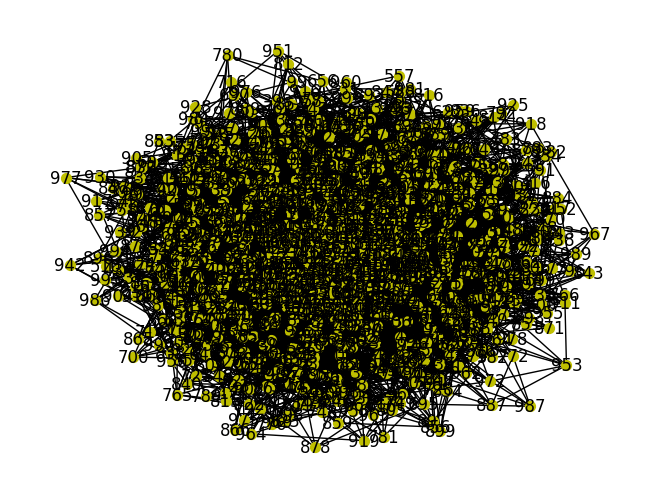

In [32]:
current_graph = graph_model(m=6,to_draw=True,number_of_nodes=1000)
